In [1]:
#| echo: false
#| include: false
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
import plotly.tools as tls
from plotly.graph_objects import Layout
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings('ignore')

pio.renderers.default = "plotly_mimetype+notebook_connected"

::: content-container
::: {.purple-background}

::: grid
::: {.g-col-19 .g-col-lg-5 .top-story-text}
## Introduction

 Female make up half of the world's population and are entitled to the same opportunities as men. However, gender inequality persists globally, with women often experiencing disparities in accessing leadership roles, economic opportunities, and education. Empowering women and girls is crucial to expand economic growth and promote social development.Therefore, it is urgent for society and individuals to tackle this issue.
:::

::: {.g-col-16 .g-col-lg-7 .top-story-img}
![](gender.png)
:::
:::

</a>
:::
:::

::: content-container
::: header-block

# Overview of Gender Imparity


In [8]:
#| echo: false
all_time = pd.read_csv("../data/cleaned/all_year_GII.csv", sep="\t", index_col=0)

data_slider = []
years = all_time["Year"].unique()

#color = [[0, 'hsl(210, 100%, 70%)'], [1, 'hsl(360, 60%, 50%)']]
#color = [[0, '#80ba33'],[0.2, '#8198d5'], [1, '#ca000d']]
color = [[0, '#85e448'], 
                    [0.09,'#85e448'],
                    [0.09,'#6bbb3e'],
                    [0.18,'#6bbb3e'],
                    [0.18,'#7bd6f3'],
                    [0.27,'#7bd6f3'],
                    [0.27,'#57c4fe'],
                    [0.36,'#57c4fe'],
                    [0.36,'#79aded'],
                    [0.45,'#79aded'],
                    [0.45,'#498ad0'],
                    [0.54,'#498ad0'],
                    [0.54,'#2c70b7'],
                    [0.63,'#2c70b7'],
                    [0.63,'#f3c20b'],
                    [0.72,'#f3c20b'],
                    [0.72,'#df3527'],
                    [0.81,'#df3527'],
                    [0.81,'#c4190d'],
                    [0.9,'#c4190d'],
                    [0.9,'#630a04'],
                   [1, '#630a04']]

for i, df_countries_group in all_time.groupby('Year'):
    data_slider.append(dict(
        type = 'choropleth',
        locations = df_countries_group['iso3'],
        z = (df_countries_group['Gender_Inequality_Index']),
        zmin = 0,
        zmax = 0.9,
        colorscale=color,
        text = df_countries_group['country'],
        colorbar = {'title' : 'GII','tick0': 0, 'dtick':0.09}, # customize tick scale
        hoverlabel = dict(namelength=0), # remove trace number
        customdata=np.stack((df_countries_group['country'], df_countries_group['Gender_Inequality_Index']), axis=-1),
        hovertemplate = '<b>Country</b>: %{customdata[0]}<br>' +
                        '<b>GII</b>: %{customdata[1]}<br>' 
    ))

steps = []
for i in range(len(years)):
    step = dict(method='restyle',
                args=['visible', [False] * len(years)],
                label=i + 1990)
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=31, 
                pad={"t": 5,"b":20},
                steps=steps,
                currentvalue={"prefix": "Year: "},
                )
                ]

layout = dict(title = {
                'text': '<b>'+'Gender Inequality Index Across the World from 1990 to 2021'+'</b>',
                'x': 0.5,  # Set x position to center
                'xanchor': 'center',  # Set x anchor to center
                'yanchor': 'top',  # Set y anchor to top
                'font': {'size': 20}  # Set font size and bold property
            },
              dragmode=False,
              sliders=sliders,
              paper_bgcolor='#f0eeeb', # set whole background color
              geo_bgcolor="#f0eeeb", # set map background color
              margin={"b":100},
              geo=dict(
                projection=dict(type='natural earth')
              ))


fig = dict(data=data_slider, 
           layout=layout
           )



pio.show(fig)

#pio.write_image(fig, 'fig1_map.png', width=2000, height=1200)

The Gender Inequality Index (GII) measures gender-based disparities in reproductive health, empowerment, and the labor market. It shows the loss in potential human development due to inequality between female and male achievements in these dimensions. The GII ranges from 0 to 1, with 0 indicating gender parity and 1 indicating the worst possible outcomes for one gender across all measured dimensions.[@HumanDevelopmentReports]

The choropleth map displayed above showcases GII values for countries worldwide from 1990 to 2021. The color bar located on the right indicates GII values range between 0 and 1, where lower GII values are represented by cooler colors (blue), and higher GII values are represented by warmer colors (red). The blank spaces on the map indicate missing GII values. The slider located at the bottom can be used to select the year of interest.

The GII values are observed to decrease over time as shown by sliding the time frame using the bottom slider. Though the rate of change is slow, it is evident that progress is being made towards resolving gender issues. Initially, nearly all countries had high GII values represented by dark purple/red color, but towards the end, a significant number of countries exhibit light blue/purple colors indicating positive development. This trend is promising, and we can anticipate further improvement in the near future.


:::
:::
</a>

::: content-container
::: header-block

# Women's Challenges in the Workplace

## Unequal Pay for Equal Work

In [6]:
#| echo: false

import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

label = None
k=0

data = pd.read_excel("../data/cleaned/Gender_Pay_Gap.xlsx", sheet_name="US short version")

Category = data['Category'].unique()[:8]

data_sub = data[~(data['Occupation'].str.lower() == data['Category'].str.lower())]
data_sub = data_sub.drop(data_sub.index[-1])

def Figure(label, k):
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}, {'type': 'bar'}]],
                        column_widths=[0.2, 0.1])

    buttons = []
    for i in range(len(Category)):
        visible_indicator = False
        if i == k:
            visible_indicator = True

        occupation = data_sub[data_sub['Category'] == Category[i]]['Occupation'].values
        pay_gap_percent = data_sub[data_sub['Category'] == Category[i]]['Pay gap as a percentage'].values
        avg_salary_women = data_sub[data_sub['Category'] == Category[i]]['Women average annual salary ($)'].values
        avg_salary_men = data_sub[data_sub['Category'] == Category[i]]['Men average annual salary ($)'].values
        fig.add_trace(
            go.Bar(
                x=occupation, y=pay_gap_percent, name=Category[i], visible=visible_indicator, base='stack',marker=dict(color='#9694e0') 
            ),
            row=1, col=2
        )
        fig.add_trace(
            go.Scatterpolar(
                r=avg_salary_men.tolist()+[avg_salary_men.tolist()[0]], theta=occupation.tolist()+[occupation.tolist()[0]], visible=visible_indicator, fill='toself', fillcolor='rgba(70, 145, 216, 0.36)', line=dict(color='#4793d8', shape='spline'), name='Men'
            ,hovertemplate='<b>%{theta}</b><br>' +'Men Average Salary: %{r:.2f}<br>' +'<extra></extra>'
            ),
            row=1, col=1
        )
        fig.add_trace(
            go.Scatterpolar(
                r=avg_salary_women.tolist()+[avg_salary_women.tolist()[0]], theta=occupation.tolist()+[occupation.tolist()[0]], visible=visible_indicator, fill='toself', fillcolor='rgba(217, 91, 74, 0.36)', line=dict(color='#d85847', shape='spline'), name='Women'
            ,hovertemplate='<b>%{theta}</b><br>' +'Women Average Salary: %{r:.2f}<br>' +'<extra></extra>'),
            row=1, col=1
        )
        
        if (label in occupation.tolist()) and (i==k):
            fig.add_trace(
                go.Scatterpolar(
                    r=[avg_salary_men[occupation.tolist().index(label)]], theta=[label], visible=visible_indicator, fill='toself', fillcolor='rgba(70, 145, 216, 0.36)', 
                    name='Men', marker=dict(size=30, color='rgba(70, 145, 216, 0.16)'), line=dict(color='#4793d8', width=10, shape='spline'), showlegend=False
                ),
                row=1, col=1
            )
            fig.add_trace(
                go.Scatterpolar(
                    r=[avg_salary_women[occupation.tolist().index(label)]], theta=[label], visible=visible_indicator, fill='toself', fillcolor='rgba(70, 145, 216, 0.36)', 
                    name='Women', marker=dict(size=30, color='rgba(217, 91, 74, 0.16)'), line=dict(color='#4793d8', width=10, shape='spline'), showlegend=False
                ),
                row=1, col=1
            )
            fig.add_trace(
                go.Bar(
                    x=[label], y=[pay_gap_percent[occupation.tolist().index(label)]], name=Category[i], visible=visible_indicator, base='stack', marker=dict(color='rgba(250, 0, 0, 0.3)'), showlegend=False
                ),
                row=1, col=2
            )
        else:
            fig.add_trace(
                go.Scatterpolar(
                    r=[np.nan], theta=[np.nan], visible=visible_indicator, fill='toself', fillcolor='rgba(70, 145, 216, 0.36)', 
                    name='Men', marker=dict(size=30, color='rgba(70, 145, 216, 0.16)'), line=dict(color='#4793d8', width=10, shape='spline'), showlegend=False
                ),
                row=1, col=1
            )
            fig.add_trace(
                go.Scatterpolar(
                    r=[np.nan], theta=[np.nan], visible=visible_indicator, fill='toself', fillcolor='rgba(70, 145, 216, 0.36)', 
                    name='Women', marker=dict(size=30, color='rgba(217, 91, 74, 0.16)'), line=dict(color='#4793d8', width=10, shape='spline'), showlegend=False
                ),
                row=1, col=1
            )
            fig.add_trace(
                go.Bar(
                    x=[np.nan], y=[np.nan], name=Category[i], visible=visible_indicator, base='stack', marker=dict(color='rgba(250, 0, 0, 0.3)'), showlegend=False
                ),
                row=1, col=2
            )

        buttons_dict = dict()
        buttons_dict['label'] = Category[i]
        buttons_dict['method'] = "update"
        visible = [False] * len(Category) * 6
        # visible[i] = True
        visible[(i + 1) * 6 - 6] = True
        visible[(i + 1) * 6 - 5] = True
        visible[(i + 1) * 6 - 4] = True
        visible[(i + 1) * 6 - 3] = True
        visible[(i + 1) * 6 - 2] = True
        visible[(i + 1) * 6 - 1] = True
        buttons_dict['args'] = [{'visible': visible}]
        buttons.append(buttons_dict)
    
    fig.update_layout(

        yaxis=dict(
        tickformat='.0%'),
        barmode='stack',
        updatemenus=[
            dict(
                direction="down",
                pad={"r": 10, "t": 10},  # PADDING
                x=0.8,  # POSITION
                y=1.27,
                xanchor="left",  # ANCHOR POINT
                yanchor="top",
                buttons=buttons,
                active=k
            )
        ],
        autosize=False,
        paper_bgcolor='#f0eeeb',
        plot_bgcolor='#f0eeeb',
        polar=dict(bgcolor='#f0eeeb',
                   radialaxis=dict(gridcolor='#d5d5d4', ticks='', #range=[0, 130000],
                                   tickfont=dict(color='#545454', size=12)),
                   angularaxis=dict(linecolor='#d5d5d4', gridwidth=2, tickcolor='#ffffff'),
                   ),
                   
        title={
            'text': '<b>' + "Gender Pay Gap by Occupation in the US (2016)" + '</b>',
            'x': 0.5,  # Set x position to center
            'y': 0.95,  # Set y position to top
            'xanchor': 'center',  # Set x anchor to center
            'yanchor': 'top',  # Set y anchor to top
            'font': {'size': 18}  # Set font size and bold property
        },
        annotations=[dict(text='<b>' +"The percentage difference in wage between men and women"+'<b>' , x=1.06, y=-0.5, font_size=14, showarrow=False, xref="paper", yref="paper", align="center")],



        
        font=dict(
            family="Arial",
            size=15,
        ),
        legend=dict(
            orientation="h",
            yanchor="top",
            y=1.25,
            xanchor="center",
            x=0.5
        ),
        margin={"t": 150, "b": 200, 'r': 50, 'l': 50},
        height=700,
        width=1000,
        
        )
    
    return fig

fig = Figure(None, 0)
#fig.write_html('demo.html')
fig.show()

The gender pay gap remains a significant issue in our society, as revealed by a radar plot depicting men's and women's salaries in various professional fields. The plot uses blue to indicate men's earnings and red for women's earnings. By hovering over each dot, the corresponding salary is displayed. The graph highlights that men generally earn more than women across different fields. 
Across different sectors, there is a consistent pattern of men earning higher salaries than women. 

For instance, in the "Science, Technology, and Engineering" sector, men's average salary is 60k, whereas women receive only 48k, representing an 80% pay gap. In the "Care and Education" sector, where more women work, men's average salary is 60k, and women receive only 48k, resulting in an 84% wage gap. On average, women earn 84% of what men earn, as seen by the overall difference in salaries.

## Burden of Unpaid Work

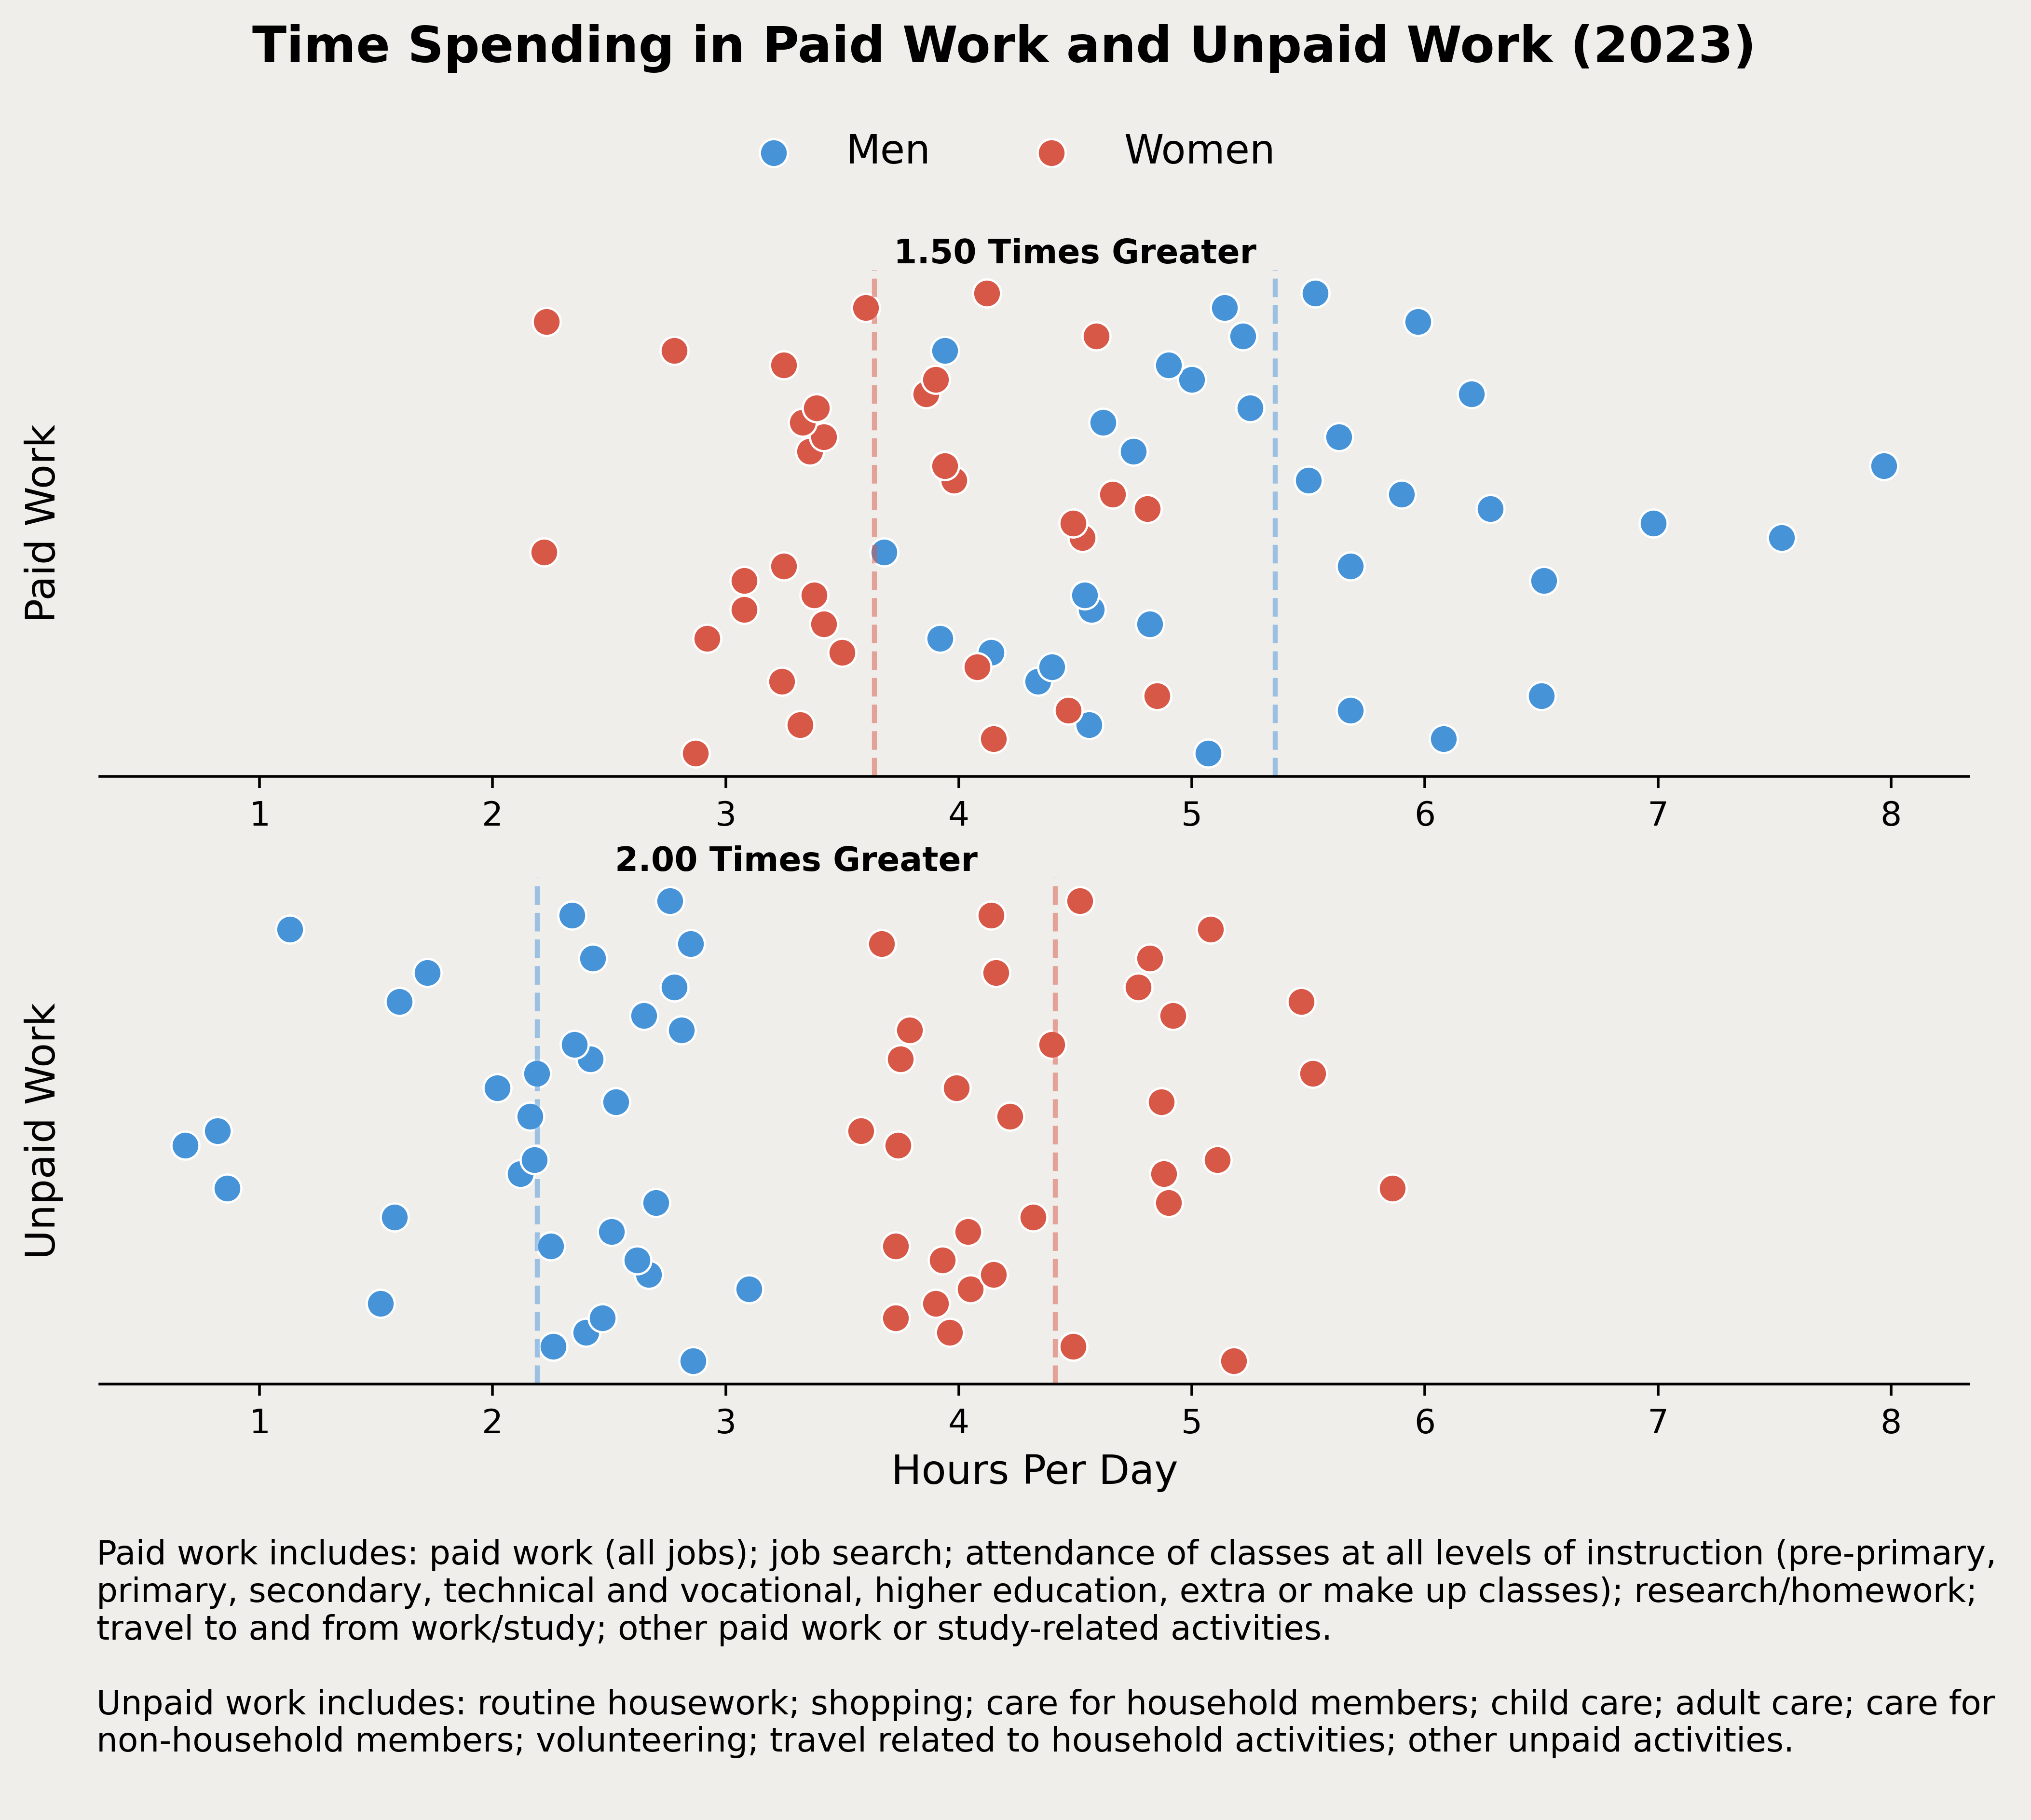

In [10]:
#| echo: false
df_dm_paid = pd.read_csv("../data/cleaned/work_clean.csv", encoding='UTF-8')

df_dm_paid['Men'] = round(df_dm_paid['Men']/60,2)
df_dm_paid['Women'] = round(df_dm_paid['Women']/60,2)


df_dm_subset =  df_dm_paid[(df_dm_paid['Category']== "Paid")]
df_dm_subset2 =  df_dm_paid[(df_dm_paid['Category']== "Unpaid")]

my_range_1 =range(1,len(df_dm_subset.index)+1)
my_range_2 =range(1,len(df_dm_subset2.index)+1)

mean_men_1 = df_dm_subset['Men'].mean()
mean_women_1 = df_dm_subset['Women'].mean()
mean_diff_1 = round(mean_men_1/mean_women_1,1)

mean_men_2 = df_dm_subset2['Men'].mean()
mean_women_2 = df_dm_subset2['Women'].mean()
mean_diff_2 = round(mean_women_2/mean_men_2,1)

fig, axs = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 6),dpi=500)

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True) # Keep the frame of the x-axis
    ax.tick_params(left=False)
    ax.set_yticklabels([])

sns.scatterplot(x = df_dm_subset['Men'], y = my_range_1,ax=axs[0],label="Men",s=70,color="#4793d8")
sns.scatterplot(x = df_dm_subset['Women'], y = my_range_1,ax=axs[0],label="Women",s=70,color="#d85847")

axs[0].axvline(mean_men_1, color="#4793d8", linestyle='dashed', label='Men Mean', alpha=0.5)
axs[0].axvline(mean_women_1, color="#d85847", linestyle='dashed', label='Women Mean', alpha=0.5)

axs[0].text((mean_men_1 + mean_women_1) / 2, axs[0].get_ylim()[1], f"{mean_diff_1:.2f} Times Greater", ha='center', va='bottom', color='black', weight='bold')

axs[0].tick_params(labelbottom=True)
axs[0].set_xlabel("")
axs[0].set_ylabel("Paid Work",fontsize=12)
axs[0].get_legend().remove()

plt.subplot(2, 1, 2)
sns.scatterplot(x = df_dm_subset2['Men'], y = my_range_2,ax=axs[1],label="Men",s=70,color="#4793d8")
sns.scatterplot(x = df_dm_subset2['Women'], y = my_range_2,ax=axs[1],label="Women",s=70,color="#d85847")

axs[1].axvline(mean_men_2, color="#4793d8", linestyle='dashed', label='Men Mean', alpha=0.5)
axs[1].axvline(mean_women_2, color="#d85847", linestyle='dashed', label='Women Mean', alpha=0.5)

axs[1].text((mean_men_2 + mean_women_2) / 2, axs[1].get_ylim()[1], f"{mean_diff_2:.2f} Times Greater", ha='center', va='bottom', color='black', weight='bold')

axs[1].set_xlabel("Hours Per Day",fontsize=12)
axs[1].set_ylabel("Unpaid Work",fontsize=12)
axs[1].get_legend().remove()


fig.legend(labels=['Men', 'Women'],loc='upper center',facecolor='none', 
           edgecolor='none',fontsize=12,ncol=2,bbox_to_anchor=(0.5, 1))
fig.suptitle('Time Spending in Paid Work and Unpaid Work (2023)',fontsize=15,weight='bold', y=1.05)
fig.set_facecolor('#f0eeeb')
axs[0].set_facecolor('#f0eeeb')  
axs[1].set_facecolor('#f0eeeb')

content = """
Paid work includes: paid work (all jobs); job search; attendance of classes at all levels of instruction (pre-primary, 
primary, secondary, technical and vocational, higher education, extra or make up classes); research/homework; 
travel to and from work/study; other paid work or study-related activities.

Unpaid work includes: routine housework; shopping; care for household members; child care; adult care; care for 
non-household members; volunteering; travel related to household activities; other unpaid activities.
"""

ax.annotate(content, xy=(0.30, -0.8), xycoords=ax.get_xaxis_transform(),fontsize=10)

fig.show()

#fig.savefig('fig3_dot.png',bbox_inches='tight', pad_inches=0.5)

The UN defines unpaid work as: “activities including food preparation, dishwashing, cleaning and upkeep of the dwelling, laundry, ironing, gardening, caring for pets, shopping, installation, servicing and repair of personal and household goods, childcare, and care of the sick, elderly, or disabled household and family members, among others.” [@UnitedNations2023]

In [12]:
#| echo: false

# Order the table
df = df_dm_paid
df['Difference'] = abs(round(df['Men'] - df['Women'],2))
assign_value = {'Paid': 1, 'Unpaid':0}
df['Category_rk'] = df['Category'].map(assign_value)
df = df.sort_values(by=['Category_rk','Difference'],ascending=[True,False])
df = df.drop('Category_rk',axis=1)

headerColor = '#959ccb'
rowEvenColor = '#ecebf0'
rowOddColor = 'white'
fig = go.Figure(data=[go.Table(
    header=dict(values=['Country', 'Men', 'Women', 'Difference','Category'],
                fill = dict(color='#C2D4FF'),
                align = ['left']+['center'] * 5,
                fill_color=headerColor),
    cells=dict(values=[df.Country, df.Men, df.Women, df.Difference,df.Category],
               fill = dict(color='#F5F8FF'),
               align = ['left']+['center'] * 5,
               fill_color = [[rowOddColor,rowEvenColor]*(len(df)//2)],
               height=30))])

fig.update_layout( plot_bgcolor='#f0eeeb',
                paper_bgcolor='#f0eeeb',
                margin={"t":50,"b":50},
                title={'text':'Time Spending in Paid and Unpaid Work by Country',
                       'x':0.5}
                
                )

fig.update_traces(
    header_font=dict(size = 15,color='white'),
    cells_font=dict(size = 15))

fig.show()

The accompanying scatter plot depicts the differences in time spent by men and women on paid and unpaid work in various countries. Each dot represents a country. On average, women spend around two times as many minutes per day on unpaid domestic work as men, leaving them with less time for paid work, leisure, and personal development. The table demonstrates the data more clearly by country. As we can see, women in India, Turkey and Portugal spend the highest hours per day on the unpaid work comparing with men. This disparity reinforces gender-based socioeconomic disadvantages and perpetuates systemic inequality.[@HelenDavies2020] It is essential to recognize and value the importance of unpaid care work and to implement policies that promote the equal distribution of caregiving responsibilities between genders. One way individuals can contribute to this effort is by sharing household chores with their mothers, sisters, and partners.

## Gender Distribution of Employment 

In [5]:
#| echo: false
df = pd.read_csv("../data/cleaned/diversity_in_different_fields_clean.csv")
# Create the horizontal stacked bar plot
fig = go.Figure(data=[go.Bar(y=df['Occupation'], x=df['Female'].values/100, 
                             name="Female", orientation='h', 
                             marker=dict(color='#e08c7e')), 
                      go.Bar(y=df['Occupation'], x=df['Male'].values/100, 
                             name="Male", orientation='h', 
                             marker=dict(color='#89a9e0'))], 
                layout=go.Layout(barmode='stack'))

fig.update_layout( 
    title={
        'text': '<b>'+"Gender Distribution Across Occupations"+'</b>',
        'x': 0.5,  # Set x position to center
        'y': 0.95,  # Set y position to top
        'xanchor': 'center',  # Set x anchor to center
        'yanchor': 'top',  # Set y anchor to top
        'font': {'size': 20}  # Set font size and bold property
    },
    xaxis=dict(
        tickformat='.0%',
    ),
    yaxis_title='<b>'+'Occupations'+'<b>', 
    xaxis_title='<b>'+'Percentage'+'<b>', 
    autosize=False, 
    height=750,
    width=820, 
    paper_bgcolor='#f0eeeb',
    plot_bgcolor='#f0eeeb',
    font=dict(family="Arial",size=15,),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.08,
        xanchor="center",
        x=0.25
    ),
    margin={"t":120,"b":100},
    template="simple_white"

)

fig.show()


The bar plot illustrates the gender distribution of employment in various fields. The data shows that STEM-related fields, such as engineering, computer science, and math, have a significantly higher proportion of male employees, with more than 70% being male. This underrepresentation of women in STEM may be attributed to the systemic discouragement of girls and women from pursuing education and training in science and math. This creates barriers to entry and limits opportunities for women to pursue these fields as adults.[@AAUW]

In contrast, there are fewer women in manual labor, while fields such as community service, healthcare, education, and administration have a higher representation of women. These fields tend to require nurturing, caretaking, and communication skills, which are often stereotypically associated with femininity. Moreover, societal expectations and pressures may also influence women's career choices, such as the perception that women are naturally suited for caregiving roles.

In [23]:
#| echo: false
import plotly.graph_objects as go
import pandas as pd

df = pd.read_excel("../data/cleaned/Occupation_table.xlsx")

buttons = []
fig = go.Figure()
n = len(df.groupby("group"))
k = 0
rowEvenColor = '#ecebf0'
rowOddColor = 'white'
for i, j in df.groupby("group"):
    name = j.iloc[0]["data"]
    j = j.iloc[1:]
    fig.add_trace(go.Table(
        header=dict(values=[name], fill_color='#C2D4FF', height=36, font_size=20),
        cells=dict(values=[j.T.values[0].tolist()], fill = dict(color='#F5F8FF'),height=25, font_size=16, align=['center'],fill_color = [[rowOddColor,rowEvenColor]*(len(df)//2)])
    ))
    buttons_dict = dict()
    buttons_dict['label'] = name
    buttons_dict['method'] = "update"
    visible = [False] * n
    visible[k] = True
    buttons_dict['args'] = [{'visible': visible}]
    buttons.append(buttons_dict)
    k = k+1

fig.update_layout(
    plot_bgcolor='#f0eeeb',paper_bgcolor='#f0eeeb',
    updatemenus=[
        dict(
            direction="down",
            pad={"r": 5, "t": 5},  # PADDING
            x=0.84,  # POSITION
            y=1.15,
            xanchor="left",  # ANCHOR POINT
            yanchor="top",
            buttons=buttons,
            active=n-1
        )
    ],
    margin={"t": 50, "b": 50},
    title={'text':'Types of Work in Each Occupation',
            'x':0.5}
)


fig.show()

## Underrepresentation of Women in Leadership Roles

In [75]:
#| echo: false

df_dm = pd.read_csv("../data/cleaned/dm_clean.csv", encoding='UTF-8') #import data

df_dm['difference'] = df_dm['Men'] - df_dm['Women']

# Sort the data frame based on the difference column
df_dm = df_dm.sort_values(by='difference', ascending=False)
name_sort = {'Academics':0,'Judiciary':1,'Business':2}
df_dm['name_sort'] = df_dm.category.map(name_sort)
df_dm = df_dm.sort_values(by=['name_sort','difference'], ascending=True)

layout = Layout(plot_bgcolor='#f0eeeb',
                paper_bgcolor='#f0eeeb') # set layout

fig = go.Figure(layout=layout)


for category in df_dm['category'].unique():
    df_dm_subset =  df_dm[(df_dm['category']== category )]
# Dot for Men
    fig.add_trace(go.Scatter(x=df_dm_subset['Men'], 
                             y=df_dm_subset['geo'], 
                             mode='markers', 
                             name='Men', 
                             marker_color='#4793d8',  
                             marker_size=10,
                             visible=False))
# Dot for Women
    fig.add_trace(go.Scatter(x=df_dm_subset['Women'], 
                             y=df_dm_subset['geo'], 
                             mode='markers', 
                             name='Women', 
                             marker_color='#d85847', 
                             marker_size=10,
                             visible=False))
# Add lines in between
    if category == 'Academics':
        for i in range(0, len(df_dm_subset)):
            fig.add_shape(type='line',
                        x0 = df_dm_subset['Men'].iloc[i],
                        y0 = i,
                        x1 = df_dm_subset['Women'].iloc[i],
                        y1 = i,
                        line=dict(color='gray', width = 2,),
                        layer='below')
            
# Make the first trace visible
fig.data[0].visible = True
fig.data[1].visible = True

# Create button
kind = df_dm['category'].unique()
button = []
for i in range(len(kind)):
    
    button_content = dict(label=kind[i],
                            method="update",
                            args=[{"visible": [False] * len(fig.data)},
                            {"shapes": []}])
    # Change visibility
    if i == 0:
        button_content['args'][0]['visible'][i] = True
        button_content['args'][0]['visible'][i+1] = True
    else:
        button_content['args'][0]['visible'][i*2] = True
        button_content['args'][0]['visible'][i*2+1] = True

    # Create line between dot for each graph and combine it with button
    shape = []
    category = df_dm['category'].unique()[i]
    df_dm_subset =  df_dm[(df_dm['category']== category )]
   
    for j in range(len(df_dm_subset)):
        shape_content = dict(
            type='line',
            x0 = df_dm_subset['Men'].iloc[j],
            y0 = j,
            x1 = df_dm_subset['Women'].iloc[j],
            y1 = j,
            line=dict(color='gray', width = 2),
            layer='below')
        shape.append(shape_content)

    button_content['args'][1]['shapes'] = shape

    button.append(button_content)

annotation = '''
Position in academic: Members of the highest decision-making body, and president or chair. <br>
Position in judiciary: Judges of the court and president of the court. <br>
Position in business: CEO, employee representatives, executives, members, non-excutives(exclude employees), President.
'''

fig.update_layout(
    # Create button
    updatemenus = [
        dict(
            buttons= list(button),
            
            direction="down",
            showactive=True,  
            pad={"r": 10, "t": 10},  
            x=0.8,  
            y=1.08,
            xanchor="left",  
            yanchor="top"
        )
    ],
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.06,
        xanchor="center",
        x=0.5
    ),
    title={
        'text': '<b>'+"Women and Men in Decision-Making Positions (2021)"+'</b>', # Bold Text
        'x': 0.5,  # Set x position to center
        'y': 0.95,  # Set y position to top
        'xanchor': 'center',  # Set x anchor to center
        'yanchor': 'top',  # Set y anchor to top
        'font': {'size': 20}  # Set font size 
    },
    xaxis_title="Headcount",
    margin={"t":100,"b":180},
    height=800,
    width=820,
    template="simple_white",
    annotations=[
        dict(text=annotation , 
             x=-0.15, y=-0.25, font_size=12, showarrow=False, xref="paper", yref="paper", align="left")],
    
)


# Show
fig.show(renderer='notebook')

#fig.write_image('fig4_connect.png', width=1500, height=1200)

The representation of women in decision-making positions worldwide is insufficient. The connected dot plot illustrates the disparity between the number of men and women in upper-level positions in academia, judiciary, and business. Men occupy these positions far more frequently than women in all three fields and in nearly every country. In certain nations, the number of men in high-ranking positions exceeds that of women by six times. However, Esther Duflo indicates that increased gender equality fosters the necessary conditions for economic development and contributes to economic growth, while further development leads to greater gender equality.[@EstherDuflo2012] Advocating for policy change at the national and international levels can help to remove structural barriers that prevent women from accessing decision-making positions. This can include policies such as paid parental leave, flexible work arrangements, and anti-discrimination legislation.

:::
:::
</a>

::: content-container
::: header-block

# Women in Education


In [77]:
#| echo: false



finEdu = pd.read_csv("../data/cleaned/edu_tmp.csv")
finEdu.rename(columns = {'Value':'GPI'}, inplace = True)

alt.data_transformers.disable_max_rows()

selection = alt.selection_single(fields=['Continent'], name='Random')

color1 = alt.condition(selection, alt.Color('Continent:N', title='Region',
                                            legend=alt.Legend(legendX=500,orient='none')), 
                                            alt.value('lightgray'))

line = (
    alt.Chart(finEdu)
    .mark_line()
    .encode(
        x = alt.X('Year:Q',scale=alt.Scale(bins = list(range(1970,2022,5))),
                  axis=alt.Axis(format="d"),
                  title='Year'),
        y = alt.Y('mean(GPI):Q', 
                  scale=alt.Scale(domain = (0.5, 1.1)),
                  title='Average Gender Parity Index'
                  ), 
        color = color1,
        tooltip = [
            alt.Tooltip('Continent:N', title='Region'),
            alt.Tooltip('Year:N', title='Year'),
            alt.Tooltip('mean(GPI):Q', title='GPI')
        ]
    )
    .add_selection(selection)
    .properties(width = 500,
                title = alt.TitleParams(
    text = "Average Primary & Secondary (Gross) School Enrollment GPI from 1970 to 2021 for Regions",
    fontSize=16))
    
)



color2 = alt.condition(
        selection,
        alt.Color('Continent:N'),
        alt.value('lightgray')
        )

bar = (
        alt.Chart(finEdu)
        .mark_bar()
        .encode(y = alt.Y('Continent:N',
                          sort=alt.EncodingSortField(
                              field = 'Continent_GR', 
                              op = 'mean', 
                              order = 'descending')
                          ),
                x = alt.X('Continent_GR:Q', 
                          axis = alt.Axis(format = ".2%")),  # Format as percentage
                color = color2,
                tooltip = [
                    alt.Tooltip('Continent:N', title='Region'),
                    alt.Tooltip('mean(Continent_GR):Q', 
                                title = 'GPI Annual Growth Rate', 
                                format = ".2%")  # Format tooltip as percentage
        ]
                )
        .add_selection(selection)
        .properties(width = 500,
                    title = alt.TitleParams(
    text = "Average Annual Gender Parity Index Growth Rate by Regions",
    fontSize=16))
)

bar.encoding.x.title = 'Average Annual GPI Growth Rate'
bar.encoding.y.title = 'Region'



chart = line & bar

# Set the background and paper background color
chart = chart.configure(
    background='#f0eeeb',
    view=alt.ViewConfig(stroke=None),
    
)

chart

alt.VConcatChart(...)

The upper line chart illustrates the Gross Enrollment Gender Parity Index (GPI) for primary and secondary education globally, spanning from the 1970s to the 2020s. GPI serves as an indicator of gender equality in education, reflecting the enrollment ratio of girls to boys in both public and private schools at primary and secondary levels. The data has been sourced from the UNESCO Institute for Statistics, gathered through official responses to its annual education survey.

A GPI value below 1 indicates that females face greater disadvantages in accessing educational opportunities compared to males, while a value above 1 suggests the reverse. The chart reveals that GPIs in Africa, Asia, and Oceania have experienced substantial growth since the 1970s, while GPIs in North America, South America, and Europe have remained relatively stable around 1.

The lower bar chart showcases the annual average GPI growth rate for regions in terms of primary and secondary school enrollment over time. It is noteworthy that the education GPI in certain parts of the world, such as South Asia, Southeast Asia, Central Asia, West Asia, and Africa, has been rising at a significantly faster pace compared to North America and Europe, where gender equality has been advocated for a longer period.

:::
:::
</a>

::: content-container
::: header-block

# Conclusion 

Gender inequality persists globally, disproportionately affecting women and girls and resulting in social disadvantages in multiple areas such as economies, education, and leadership. While some countries have made progress in improving gender equality, few have achieved true gender parity. Gender wage disparities, underrepresentation of women in STEM fields, and limited participation in decision-making positions remain significant challenges.

Empowering women is essential for promoting economic growth and social development. National and international policy changes can eliminate structural barriers that hinder women's access to leadership positions and increase their participation in STEM-related work fields. Improving overall economic conditions can create a virtuous cycle and improve gender equality, leading to greater economic growth and prosperity for all. Therefore, achieving gender equality is not only a moral obligation but also a necessary path to a more just and prosperous society.

:::
:::
</a>

# Reference
::: {#refs}
:::

## {.appendix}
Theme by Brian Tarran